In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import random
from ipywidgets import interact, interact_manual
import ipywidgets as widgets
from IPython import display
import time
from pathlib import Path
import pandas as pd
import os
import copy
import networkx as nx
import pickle
import sys
from scipy import stats

%matplotlib inline

In [2]:
basepath = '/home/kyoko/デスクトップ/Develop/ActualCausation/MABE/MABE_contents/'# basepath

#path = os.path.join(basepath,'actual_agency')
path = os.path.join(basepath,'actual_agency') #actualagency
print(path)
sys.path.append(path)

from pyanimats import *
from pyTPM import *
import actual_agency as agency

path = os.path.join('/home/kyoko/.anyenv/envs/pyenv/versions/anaconda3-5.1.0/envs/pyphikit/lib/python3.6/site-packages/pyphi') #pyphi
print(path)
sys.path.append(path)

import pyphi
from pyphi import actual, config, Direction

/home/kyoko/デスクトップ/Develop/ActualCausation/MABE/MABE_contents/actual_agency

Welcome to PyPhi!

If you use PyPhi in your research, please cite the paper:

  Mayner WGP, Marshall W, Albantakis L, Findlay G, Marchman R, Tononi G.
  (2018). PyPhi: A toolbox for integrated information theory.
  PLOS Computational Biology 14(7): e1006343.
  https://doi.org/10.1371/journal.pcbi.1006343

Documentation is available online (or with the built-in `help()` function):
  https://pyphi.readthedocs.io

To report issues, please use the issue tracker on the GitHub repository:
  https://github.com/wmayner/pyphi

For general discussion, you are welcome to join the pyphi-users group:
  https://groups.google.com/forum/#!forum/pyphi-users

To suppress this message, either:
  - Set `WELCOME_OFF: true` in your `pyphi_config.yml` file, or
  - Set the environment variable PYPHI_WELCOME_OFF to any value in your shell:
        export PYPHI_WELCOME_OFF='yes'

/home/kyoko/.anyenv/envs/pyenv/versions/anaconda3-5.1.0/

In [3]:
%load_ext autoreload
%autoreload 2
%aimport pyTPM, pyanimats, actual_agency

# Lets inspect the fitness of the animats

In [4]:
# First, tell the computer where to look for files
basepath = '/home/kyoko/デスクトップ/Develop/ActualCausation/MABE/MABE_contents/Experiments/'#bathpath of MABE
path = os.path.join(basepath,'190819_1_7') #name of experiment


In [5]:
# Get Line-of-descent (LOD) data from MABE output
with open(os.path.join(path,'190819_17_LOD_data.pkl'),'rb') as f:
    LOD_data = pickle.load(f)

In [6]:
n_runs = 10
for n in range(n_runs):
    print(LOD_data[n]['correct_LIST'].dtype)
    print(LOD_data[n]['incorrect_LIST'].dtype)

int64
object
int64
object
int64
object
int64
object
int64
object
int64
object
int64
int64
int64
object
int64
object
int64
object


In [37]:
LOD_data[0]

,update,timeToCoalescence,ID,Simple_numOffspring,alive,correct_AVE,correct_LIST,countCopy,countDelete,countIndel,...,incorrect_AVE,incorrect_LIST,markovBrainDeterministicGates,markovBrainGates,markovBrain_nextNodesConnections_LIST,markovBrain_nodesConnections_LIST,optimizeValue,score_AVE,score_LIST,timeOfBirth
0,0,0,30,1,1,31.0,31,0,0,0,...,33.0,33,2,2,"0,0,0,2,1,1,0,0,2,0","1,2,0,0,1,0,1,1,2,0",0.907029,0.907029,0.907029,-1
1,500,0,50017,4,1,45.0,45,28,36,0,...,19.0,19,1,1,"0,1,0,0,0,1,1,0,1,0","1,1,0,0,0,0,0,0,1,1",3.555673,3.555673,3.555673,499
2,1000,0,100077,5,1,50.0,50,104,88,0,...,14.0,14,2,2,"1,0,0,0,1,2,0,0,2,0","2,2,0,0,0,2,0,0,2,0",5.791816,5.791816,5.791816,999
3,1500,0,150009,2,1,55.0,55,183,172,0,...,9.0,"9,",1,1,"0,0,0,0,1,1,1,0,1,0","1,1,0,0,0,0,0,0,1,0",9.434258,9.434258,9.434258,1499
4,2000,0,200073,1,1,55.0,55,242,238,0,...,9.0,"9,",1,1,"0,1,0,0,1,1,0,0,1,0","1,1,0,0,0,0,0,0,1,0",9.434258,9.434258,9.434258,1999
5,2500,0,250066,4,1,55.0,55,311,311,0,...,9.0,"9,",1,1,"0,0,0,1,1,1,0,0,1,0","1,1,0,0,0,0,0,0,1,0",9.434258,9.434258,9.434258,2499
6,3000,0,300092,1,1,55.0,55,392,374,0,...,9.0,"9,",4,4,"0,2,1,4,2,3,0,0,2,0","2,3,2,0,0,0,0,0,2,1",9.434258,9.434258,9.434258,2999
7,3500,0,350094,2,1,55.0,55,553,513,0,...,9.0,"9,",2,2,"0,0,0,2,2,1,0,1,1,0","1,1,0,0,0,0,0,0,1,1",9.434258,9.434258,9.434258,3499
8,4000,0,400082,3,1,55.0,55,708,668,0,...,9.0,"9,",1,1,"0,0,0,1,1,1,0,0,1,0","1,1,0,0,0,0,0,0,1,0",9.434258,9.434258,9.434258,3999
9,4500,0,450038,4,1,55.0,55,869,828,0,...,9.0,"9,",1,1,"0,0,0,0,1,1,0,0,1,1","1,1,0,0,0,0,0,0,1,0",9.434258,9.434258,9.434258,4499


In [7]:
# add fitness to the LOD data structure
n_runs = 10
for n in range(n_runs):
    LOD_data[n]['fitness'] = (LOD_data[n]['correct_AVE']
                               /(LOD_data[n]['correct_AVE']+LOD_data[n]['incorrect_AVE']))

In [9]:
for n in range(n_runs):
    print(LOD_data[n]['correct_LIST'])
    print(LOD_data[n]['incorrect_LIST'])

0     31
1     45
2     50
3     55
4     55
      ..
56    62
57    62
58    62
59    62
60    62
Name: correct_LIST, Length: 61, dtype: int64
0     33
1     19
2     14
3     9,
4     9,
      ..
56    2,
57    2,
58    2,
59    2,
60    2,
Name: incorrect_LIST, Length: 61, dtype: object
0     31
1     44
2     54
3     54
4     57
      ..
56    63
57    63
58    63
59    63
60    63
Name: correct_LIST, Length: 61, dtype: int64
0     33
1     20
2     10
3     10
4     7,
      ..
56    1,
57    1,
58    1,
59    1,
60    1,
Name: incorrect_LIST, Length: 61, dtype: object
0     31
1     51
2     51
3     51
4     51
      ..
56    64
57    64
58    64
59    64
60    64
Name: correct_LIST, Length: 61, dtype: int64
0     33
1     13
2     13
3     13
4     13
      ..
56    0,
57    0,
58    0,
59    0,
60    0,
Name: incorrect_LIST, Length: 61, dtype: object
0     31
1     46
2     46
3     49
4     50
      ..
56    61
57    61
58    61
59    61
60    64
Name: correct_LIST, Length: 

In [8]:
# inspect the LOD data for a specific LOD (run)
run = 1
LOD_data[run]

,update,timeToCoalescence,ID,Simple_numOffspring,alive,correct_AVE,correct_LIST,countCopy,countDelete,countIndel,...,incorrect_LIST,markovBrainDeterministicGates,markovBrainGates,markovBrain_nextNodesConnections_LIST,markovBrain_nodesConnections_LIST,optimizeValue,score_AVE,score_LIST,timeOfBirth,fitness
0,0,0,67,3,1,31.0,31,0,0,0,...,33,2,2,"0,1,0,0,1,2,0,0,1,2","3,1,0,0,0,0,0,0,0,1",0.907029,0.907029,0.907029,-1,0.484375
1,500,0,50081,1,1,44.0,44,130,114,0,...,20,3,3,"1,1,0,1,1,2,2,0,0,0","2,2,1,1,0,0,2,0,0,0",3.225100,3.225100,3.225100,499,0.687500
2,1000,0,100068,2,1,54.0,54,204,195,0,...,10,4,4,"0,2,0,0,1,1,2,0,2,1","1,5,0,2,1,0,2,0,1,0",8.557150,8.557150,8.557150,999,0.843750
3,1500,0,150072,4,1,54.0,54,320,296,0,...,10,3,3,"1,1,1,0,1,1,2,0,1,1","1,4,0,0,0,0,1,0,2,0",8.557150,8.557150,8.557150,1499,0.843750
4,2000,0,200033,2,1,57.0,57,485,459,0,...,"7,",5,5,"1,1,1,0,1,2,2,0,1,1","2,5,0,0,0,1,2,0,3,2",11.467400,11.467400,11.467400,1999,0.890625
5,2500,0,250071,3,1,59.0,59,664,627,0,...,"5,",3,3,"0,0,1,1,1,1,1,0,1,2","1,4,0,0,0,0,1,0,2,1",13.938696,13.938696,13.938696,2499,0.921875
6,3000,0,300049,3,1,61.0,61,826,811,0,...,"3,",4,4,"0,1,2,0,2,2,1,0,1,1","1,4,0,0,0,0,3,0,2,1",16.942572,16.942572,16.942572,2999,0.953125
7,3500,0,350025,2,1,61.0,61,966,944,0,...,"3,",4,4,"0,1,4,1,2,2,1,0,1,1","1,4,0,0,0,0,3,0,2,1",16.942572,16.942572,16.942572,3499,0.953125
8,4000,0,400018,3,1,61.0,61,1124,1116,0,...,"3,",3,3,"0,0,0,0,1,1,1,1,1,1","1,3,0,0,0,1,2,0,2,1",16.942572,16.942572,16.942572,3999,0.953125
9,4500,0,450014,4,1,61.0,61,1279,1276,0,...,"3,",3,3,"0,0,0,0,1,1,1,1,1,1","1,3,0,1,0,1,2,0,2,1",16.942572,16.942572,16.942572,4499,0.953125


In [9]:
# inspect the fitness of a specific LOD (run)
heading = 'fitness'
LOD_data[run][heading][:]


0     0.484375
1     0.687500
2     0.843750
3     0.843750
4     0.890625
        ...   
56    0.984375
57    0.984375
58    0.984375
59    0.984375
60    0.984375
Name: fitness, Length: 61, dtype: float64

In [12]:
# and write the values to a new list
n_agents = 61
n_runs = 10
fitness_data = [[LOD_data[r][heading][i] for i in range(n_agents)] for r in range(n_runs)]
[print(x) for x in fitness_data]

KeyError: 'fitness'

# Now let's look at the genome data

In [13]:

# Get the genome from our output
with open(os.path.join(path,'190819_17_genome.pkl'),'rb') as f:
    all_genomes = pickle.load(f)
    


In [14]:
all_genomes[0]

,GENOME_root::_genomeLength,GENOME_root::_sites,ID,update
0,5000,"110,165,26,140,197,222,105,231,59,43,91,251,11...",30,0
1,2328,"110,167,59,160,49,225,21,73,39,171,105,2,225,7...",50017,500
2,11862,"29,61,59,195,28,28,214,194,12,227,105,52,186,1...",100077,1000
3,8149,"212,61,72,51,233,192,48,215,110,72,195,125,157...",150009,1500
4,6528,"108,98,147,166,161,15,158,221,112,61,36,215,16...",200073,2000
5,4811,"66,198,147,119,213,82,223,113,231,121,15,137,6...",250066,2500
6,11301,"164,23,200,4,213,158,185,132,108,58,190,137,24...",300092,3000
7,18495,"43,198,205,120,143,196,76,132,62,0,159,98,53,2...",350094,3500
8,15933,"142,50,253,230,170,57,68,208,219,92,191,24,174...",400082,4000
9,15884,"22,245,42,123,227,167,195,2,219,127,35,167,169...",450038,4500


In [24]:
# we can pick the genome of one agent and parse it (make it readable for our scripts) 
run, agent = 0,60
genome = agency.get_genome(all_genomes, run, agent)

# from the genome we can reconstruct the TPM (transition probability matrix) and CM (connectivity matrix)
TPM, TPM_gates, cm = genome2TPM(genome, n_nodes=8, n_sensors=2, n_motors=2, gate_type='deterministic',states_convention='loli',remove_sensor_motor_effects=True)


In [25]:
# then we can inspect the TPM
[print(x) for x in TPM] 

[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [17]:
TPM_gates

[{'type': 'deterministic',
  'ins': array([2, 3]),
  'outs': array([1, 3, 7, 0]),
  'logic': [[0.0, 0.0, 0.0, 0.0],
   [0.0, 0.0, 0.0, 1.0],
   [1.0, 0.0, 1.0, 1.0],
   [0.0, 1.0, 1.0, 0.0]]},
 {'type': 'deterministic',
  'ins': array([2, 4, 5]),
  'outs': array([0, 6, 7]),
  'logic': [[0.0, 1.0, 0.0],
   [0.0, 1.0, 0.0],
   [0.0, 0.0, 1.0],
   [0.0, 1.0, 1.0],
   [1.0, 0.0, 1.0],
   [0.0, 0.0, 1.0],
   [1.0, 1.0, 1.0],
   [1.0, 1.0, 0.0]]},
 {'type': 'deterministic',
  'ins': array([2, 7, 6, 4]),
  'outs': array([1, 2, 5]),
  'logic': [[1.0, 0.0, 0.0],
   [1.0, 0.0, 0.0],
   [0.0, 1.0, 0.0],
   [0.0, 1.0, 0.0],
   [0.0, 1.0, 0.0],
   [1.0, 1.0, 1.0],
   [1.0, 1.0, 1.0],
   [1.0, 1.0, 0.0],
   [0.0, 1.0, 1.0],
   [0.0, 1.0, 1.0],
   [0.0, 0.0, 1.0],
   [0.0, 1.0, 1.0],
   [1.0, 1.0, 0.0],
   [1.0, 0.0, 0.0],
   [1.0, 0.0, 1.0],
   [1.0, 1.0, 0.0]]},
 {'type': 'deterministic',
  'ins': array([6, 4, 3]),
  'outs': array([1, 6, 7]),
  'logic': [[0.0, 1.0, 1.0],
   [0.0, 1.0, 1.0],
   [1.0

In [27]:
# and also the connectivity matrix (CM)
print(cm)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


# Last part of the output is the activity pattern

In [19]:
# First get the data from our MABE output
with open(os.path.join(path,'190819_17_activity.pkl'),'rb') as f:
    activity = pickle.load(f)
    

In [20]:
# reformat the activity to a single list for each trial
brain_activity = []
for r in range(n_runs):
    brain_activity.append(agency.getBrainActivity(activity[r], n_agents))

Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...


In [26]:
# inspect activity for a given run, agent, and trial
run = 0
agent = 60
trial = 2
print(brain_activity[run][agent][trial])

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 1.]]


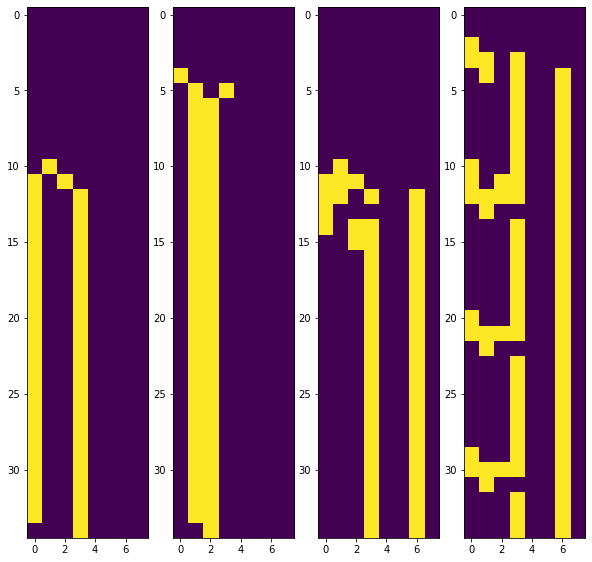

In [22]:
run, agent, wait = 0,20,4
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow(brain_activity[run][agent][0+wait])
plt.subplot(1,4,2)
plt.imshow(brain_activity[run][agent][16+wait])
plt.subplot(1,4,3)
plt.imshow(brain_activity[run][agent][32+wait])
plt.subplot(1,4,4)
plt.imshow(brain_activity[run][agent][48+wait])

# The next step is doing some actual causation analysis

In [28]:
# let's analyse the actual causes of the motor occurences for the animat in one trial
run, agent, trial, occ = 0, 20, 52, 15

# First we can inspect the occurrences
X,Y = agency.get_occurrences(np.array(brain_activity[run][agent]),numSensors=2,numHidden=4,numMotors=2)
print('transition from {} to {}'.format(X[trial][occ],Y[trial][occ]))

transition from [0. 0. 0. 0. 0. 0. 1. 0.] to [0. 0. 0. 1. 0. 0. 1. 0.]


In [29]:
# to actually do the AC analysis we must first define a network for pyphi
network = pyphi.network.Network(np.array(TPM), cm=np.array(cm), 
            node_labels=('S1','S2','M1','M2','H1','H2','H3','H4'), purview_cache=None)


In [ ]:
print(network)

In [ ]:
ba = np.array()

In [30]:
# now we can run a script for calculating the direct causes of all motor occurrences
purview, alpha, motorstate, transitions, account = agency.AnalyzeTransitions(
            network, brain_activity[run][agent][trial], 
            cause_indices=[0,1,4,5,6,7], effect_indices=[2,3],
            sensor_indices=[0,1], motor_indices=[2,3])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
motorstate

In [ ]:
(brain_activity[run][agent][trial]).shape

In [ ]:
# Now we can inspect the causal account and other output of AC analysis for all unique transitions in the trial!
t = 3
print('transition from {} to {}'.format(transitions[t][0],transitions[t][1]))
print('state of the motors was:')
print(motorstate[t])
print('the indices for the elements in the cause of the higher order occurrence was: ')
print(purview[t])
print('the irreducibility of the higher order cause was:')
print(alpha[t])
print(account[t])


In [ ]:
print(account)

In [ ]:
len(account)